# STA 141B Final Project - 
By Jonathan Ramirez (917484777) and Youjung Hong

In [1]:
#We will import all the packages we will be using for extracting and storing the data


import requests
import pandas as pd
from datetime import datetime




def get_genres(api_key):
    """Fetch movie genres from TMDb."""
    url = f"https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}&language=en-US"
    response = requests.get(url)
    return response.json()['genres'] if response.status_code == 200 else []

def get_movies_by_year_and_genre(api_key, year, genre_id):
    """Fetch movies for a specific year and genre."""
    url = f"https://api.themoviedb.org/3/discover/movie?api_key={api_key}&primary_release_year={year}&with_genres={genre_id}"
    response = requests.get(url)
    return response.json()['results'] if response.status_code == 200 else []

# Function to get the most popular movie by genre and year
def get_most_popular_movie_by_genre(api_key, year, genre_id):
    url = f"https://api.themoviedb.org/3/discover/movie?api_key={api_key}&sort_by=popularity.desc&primary_release_year={year}&with_genres={genre_id}"
    response = requests.get(url)
    if response.status_code == 200 and 'results' in response.json() and response.json()['results']:
        return response.json()['results'][0]
    else:
        return None
def get_movie_details(api_key, movie_id):
    """Fetch movie details, including production countries and revenue."""
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}"
    response = requests.get(url)
    return response.json() if response.status_code == 200 else None    


# This is our TMDb API key
api_key = 'fe4ce57ae1def46fc40c26653707478f'

genres = get_genres(api_key)

start_year = 1980
end_year = 2023
interval = 5

# Assuming you have a genres dictionary from previous steps
genres_dict = {genre['name']: genre['id'] for genre in get_genres(api_key)}
movies_data = []

for year in range(start_year, end_year + 1, 5):  # Iterate every 5 years
    for genre in genres:
        movies = get_movies_by_year_and_genre(api_key, year, genre['id'])
        for movie in movies:
            movies_data.append({
                'year': year,
                'genre': genre['name'],
                'title': movie['title'],
                'vote_average': movie['vote_average']
            })

movies_df = pd.DataFrame(movies_data)



# Calculate the mean vote_average for each genre and year combination
genre_avg_vote = movies_df.groupby(['year', 'genre'])['vote_average'].mean().reset_index()

# Get the top 10 genres by the number of movies they have
top_genres = movies_df['genre'].value_counts().nlargest(10).index

# Filter the DataFrame to only include the top 10 genres
top_genre_avg_vote = genre_avg_vote[genre_avg_vote['genre'].isin(top_genres)]

# Pivot the table to get years as the index and genres as columns
pivot_avg_vote = top_genre_avg_vote.pivot(index='year', columns='genre', values='vote_average')


# Step 1: Fetch the genres and create a dictionary
genres_list = get_genres(api_key)  # You already have the `get_genres` function
genres_dict = {genre['name']: genre['id'] for genre in genres_list}

# Count the number of movies in each genre
genre_counts = movies_df['genre'].value_counts()

# Select the top 10 genres
top_genres = genre_counts.head(10)

# Calculate the mean vote_average for each genre
genre_avg_vote = movies_df.groupby('genre')['vote_average'].mean().sort_values(ascending=False)

# Select the top 10 genres based on average vote
top_genres_by_vote = genre_avg_vote.head(10)

# Create a DataFrame for the top genres by average vote
top_genres_by_vote_df = pd.DataFrame({
    'Genre': top_genres_by_vote.index,
    'Average Vote': top_genres_by_vote.values
})

print(top_genres_by_vote_df)



       Genre  Average Vote
0  Animation      6.896111
1      Drama      6.878889
2    Romance      6.627778
3     Action      6.563333
4      Crime      6.548889
5     Comedy      6.529444
6  Adventure      6.494444
7     Family      6.493333
8    Fantasy      6.411667
9   Thriller      6.411667


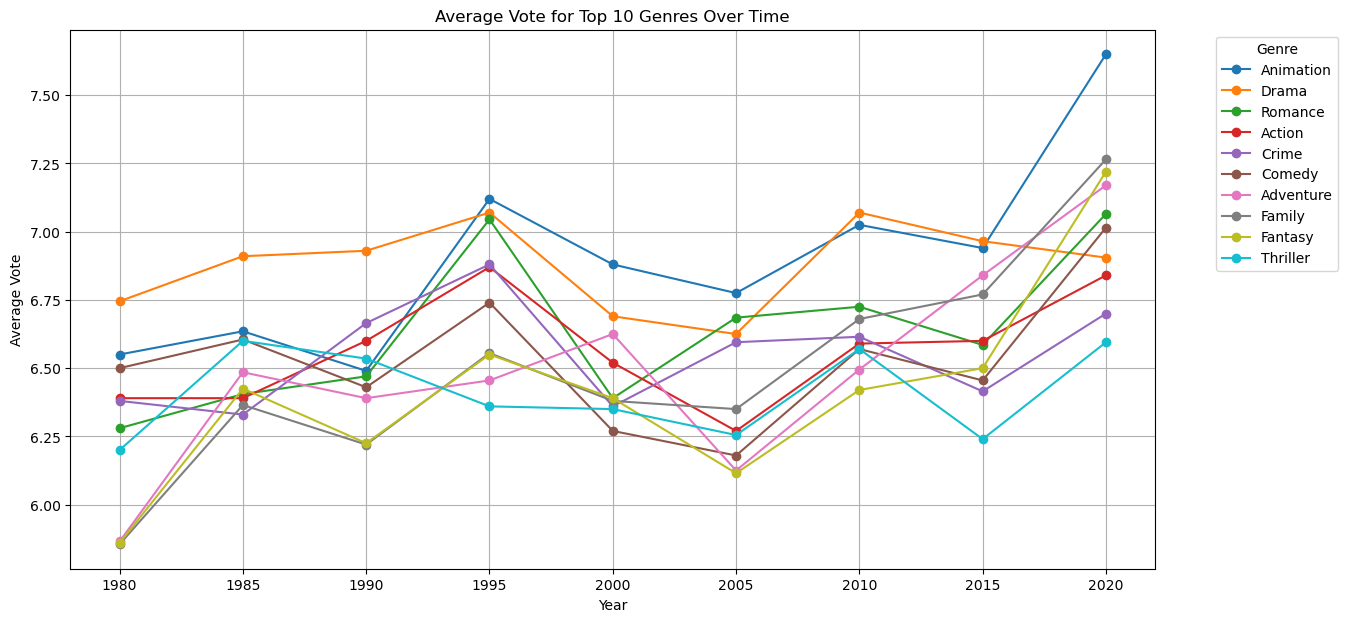

In [89]:

import matplotlib.pyplot as plt
# Assuming genre_avg_vote is already sorted by average vote and contains the necessary data
top_genres_list = top_genres_by_vote_df['Genre'].head(10).tolist()

# Filter the original movies_df to only include movies from the top genres
filtered_movies_df = movies_df[movies_df['genre'].isin(top_genres_list)]

# Group by year and genre, then calculate the average vote
yearly_genre_avg = filtered_movies_df.groupby(['year', 'genre'])['vote_average'].mean().reset_index()

# Pivot to get years as index and genres as columns
pivot_data = yearly_genre_avg.pivot(index='year', columns='genre', values='vote_average')

# Define your color map
color_map = {
    'Animation': 'blue',
    'Drama': 'green',
    'Romance': 'black',
    'Action': 'red',
    'Crime': 'purple',
    'Comedy': 'cyan',
    'Adventure': 'magenta',
    'Family': 'lime',
    'Fantasy': 'orange',
    'Thriller': 'brown'
}

# Plotting the line chart
plt.figure(figsize=(14, 7))
for genre in top_genres_list:
    plt.plot(pivot_data.index, pivot_data[genre], label=genre, marker='o')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Vote for Top 10 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average Vote')
plt.grid(True)
plt.show()

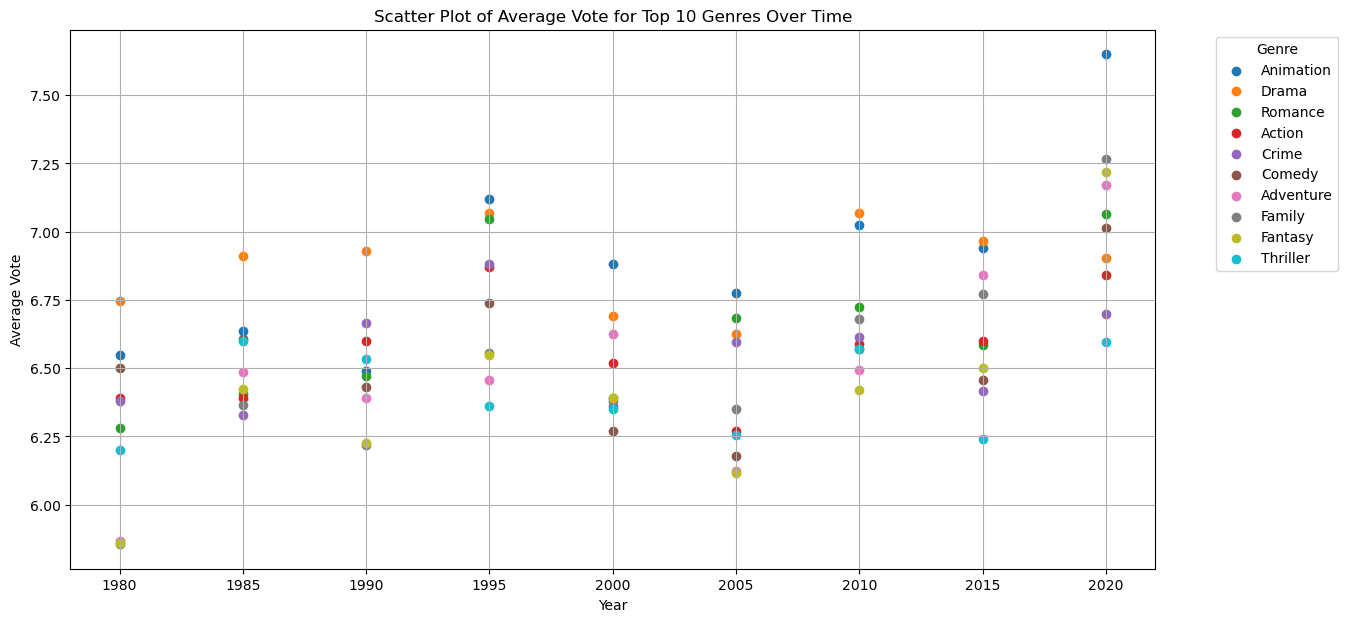

In [90]:
# Plotting the scatter plot
plt.figure(figsize=(14, 7))
for genre in top_genres_list:
    plt.scatter(pivot_data.index, pivot_data[genre], label=genre)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatter Plot of Average Vote for Top 10 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average Vote')
plt.grid(True)
plt.show()

In [91]:
for year in range(start_year, end_year + 1, interval):
    # Calculate the average vote for each genre in the year
    yearly_data = movies_df[movies_df['year'] == year]
    genre_avg_vote = yearly_data.groupby('genre')['vote_average'].mean().sort_values(ascending=False)
    
    # Determine the top 3 genres for the year
    top_3_genres = genre_avg_vote.head(3).index.tolist()
    
    print(f"Year: {year} - Top 3 Genres: {top_3_genres}")
    
    # Find and print the most popular movie in each of the top 3 genres
    for genre in top_3_genres:
        genre_id = genres_dict[genre]  # genres_dict should be predefined as {genre_name: genre_id}
        most_popular_movie = get_most_popular_movie_by_genre(api_key, year, genre_id)
        if most_popular_movie:
            print(f"Most popular movie in {genre}: '{most_popular_movie['title']}' with a popularity score of {most_popular_movie['popularity']}")
        else:
            print(f"No popular movies found for genre {genre} in {year}")
    print("-" * 20)

Year: 1980 - Top 3 Genres: ['Drama', 'Animation', 'Comedy']
Most popular movie in Drama: 'Oscenità' with a popularity score of 67.025
Most popular movie in Animation: 'The Return of the King' with a popularity score of 19.807
Most popular movie in Comedy: 'Popeye' with a popularity score of 40.224
--------------------
Year: 1985 - Top 3 Genres: ['Drama', 'Animation', 'Comedy']
Most popular movie in Drama: 'Amazonia: The Catherine Miles Story' with a popularity score of 63.15
Most popular movie in Animation: 'The Black Cauldron' with a popularity score of 30.323
Most popular movie in Comedy: 'Back to the Future' with a popularity score of 76.106
--------------------
Year: 1990 - Top 3 Genres: ['Drama', 'Crime', 'Action']
Most popular movie in Drama: 'GoodFellas' with a popularity score of 72.967
Most popular movie in Crime: 'GoodFellas' with a popularity score of 72.967
Most popular movie in Action: 'Dragon Ball Z: Bardock - The Father of Goku' with a popularity score of 68.301
--------